In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("fleet_project_datasets_fixed.csv")

In [42]:
df

,vehicle_id,make,model,year,vehicle_type,capacity_kg,purchase_date,current_mileage_km,fuel_efficiency_km_l,annual_maintenance_cost,driver_performance_score,vechicle_age,cost_per_km,monthly_milegade,vechicle_age_month,efficiency_category
0,VEH1000,Isuzu,ModelA,2010,Trailer,13234,2022-06-17,824724,4.4,3154.69,64,41,0.0038,1676.2683,492,Low
1,VEH1001,Volvo,ModelE,2017,Van,19290,2018-05-14,312114,8.4,1671.87,77,90,0.0054,288.9944,1080,Low
2,VEH1002,MAN,ModelD,2023,Van,7254,2023-08-03,69279,8.8,962.02,87,27,0.0139,213.8241,324,Low
3,VEH1003,Isuzu,ModelD,2023,Van,18144,2023-12-11,63946,12.5,1085.36,81,23,0.0170,231.6884,276,Medium
4,VEH1004,Toyota,ModelD,2021,Van,8350,2021-04-27,92481,11.0,1039.38,80,55,0.0112,140.1227,660,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,VEH1195,Scania,ModelB,2022,Truck,19574,2022-07-22,161905,5.3,1929.69,65,40,0.0119,337.3021,480,Low
196,VEH1196,Volvo,ModelA,2017,Van,10184,2018-02-21,276152,12.3,1536.51,62,93,0.0056,247.4480,1116,Medium
197,VEH1197,Mercedes,ModelD,2013,Truck,3192,2016-05-24,910612,3.8,2867.46,66,114,0.0031,665.6520,1368,Low
198,VEH1198,Mercedes,ModelE,2018,Truck,2248,2018-06-13,528384,4.8,2236.13,67,89,0.0042,494.7416,1068,Low


In [43]:
df.shape

(200, 16)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   vehicle_id                200 non-null    object        
 1   make                      200 non-null    object        
 2   model                     200 non-null    object        
 3   year                      200 non-null    int64         
 4   vehicle_type              200 non-null    object        
 5   capacity_kg               200 non-null    int64         
 6   purchase_date             200 non-null    datetime64[ns]
 7   current_mileage_km        200 non-null    int64         
 8   fuel_efficiency_km_l      200 non-null    float64       
 9   annual_maintenance_cost   200 non-null    float64       
 10  driver_performance_score  200 non-null    int64         
 11  vechicle_age              200 non-null    int32         
 12  cost_per_km           

In [45]:
df.isnull().sum()

vehicle_id                  0
make                        0
model                       0
year                        0
vehicle_type                0
capacity_kg                 0
purchase_date               0
current_mileage_km          0
fuel_efficiency_km_l        0
annual_maintenance_cost     0
driver_performance_score    0
vechicle_age                0
cost_per_km                 0
monthly_milegade            0
vechicle_age_month          0
efficiency_category         0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df['purchase_date']=pd.to_datetime(df['purchase_date'])

In [48]:
df.dtypes

vehicle_id                          object
make                                object
model                               object
year                                 int64
vehicle_type                        object
capacity_kg                          int64
purchase_date               datetime64[ns]
current_mileage_km                   int64
fuel_efficiency_km_l               float64
annual_maintenance_cost            float64
driver_performance_score             int64
vechicle_age                         int32
cost_per_km                        float64
monthly_milegade                   float64
vechicle_age_month                   int32
efficiency_category                 object
dtype: object

In [49]:
capacity_kg=df[df["capacity_kg"] <= 0]

In [50]:
current_mileage=df[df["current_mileage_km"] < 0]

In [51]:
fuel_efficiency_km_l=df[(df['fuel_efficiency_km_l']<0) | df['fuel_efficiency_km_l']>60]

In [52]:
annual_maintenance_cost=df[df['annual_maintenance_cost']<0]

In [53]:
driver_performance_score=df[(df['driver_performance_score'] <0) | (df['driver_performance_score']>100)]

In [54]:
df

,vehicle_id,make,model,year,vehicle_type,capacity_kg,purchase_date,current_mileage_km,fuel_efficiency_km_l,annual_maintenance_cost,driver_performance_score,vechicle_age,cost_per_km,monthly_milegade,vechicle_age_month,efficiency_category
0,VEH1000,Isuzu,ModelA,2010,Trailer,13234,2022-06-17,824724,4.4,3154.69,64,41,0.0038,1676.2683,492,Low
1,VEH1001,Volvo,ModelE,2017,Van,19290,2018-05-14,312114,8.4,1671.87,77,90,0.0054,288.9944,1080,Low
2,VEH1002,MAN,ModelD,2023,Van,7254,2023-08-03,69279,8.8,962.02,87,27,0.0139,213.8241,324,Low
3,VEH1003,Isuzu,ModelD,2023,Van,18144,2023-12-11,63946,12.5,1085.36,81,23,0.0170,231.6884,276,Medium
4,VEH1004,Toyota,ModelD,2021,Van,8350,2021-04-27,92481,11.0,1039.38,80,55,0.0112,140.1227,660,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,VEH1195,Scania,ModelB,2022,Truck,19574,2022-07-22,161905,5.3,1929.69,65,40,0.0119,337.3021,480,Low
196,VEH1196,Volvo,ModelA,2017,Van,10184,2018-02-21,276152,12.3,1536.51,62,93,0.0056,247.4480,1116,Medium
197,VEH1197,Mercedes,ModelD,2013,Truck,3192,2016-05-24,910612,3.8,2867.46,66,114,0.0031,665.6520,1368,Low
198,VEH1198,Mercedes,ModelE,2018,Truck,2248,2018-06-13,528384,4.8,2236.13,67,89,0.0042,494.7416,1068,Low


In [55]:
from datetime import datetime
today=datetime(2025,11,29)
df['vechicle_age']=(today.year-df['purchase_date'].dt.year)*12+(today.month-df['purchase_date'].dt.month)

In [56]:
df['cost_per_km']=df['annual_maintenance_cost']/df['current_mileage_km']
df['cost_per_km']=df['cost_per_km'].replace([float('inf'), -float('inf')], np.nan)

In [57]:
df['cost_per_km']=df['cost_per_km'].round(4)

In [58]:
df['cost_per_km']

0      0.0038
1      0.0054
2      0.0139
3      0.0170
4      0.0112
        ...  
195    0.0119
196    0.0056
197    0.0031
198    0.0042
199    0.0035
Name: cost_per_km, Length: 200, dtype: float64

In [59]:
#	Monthly mileage (current_mileage_km / vehicle_age_months)
df['vechicle_age_month']=df['vechicle_age']*12
df['monthly_milegade']=df['current_mileage_km']/df['vechicle_age_month']
df['monthly_milegade']=df['monthly_milegade'].replace([float('inf'), -float('inf')], np.nan)
df['monthly_milegade']=df['monthly_milegade'].round(4)

In [60]:
df['monthly_milegade']

0      1676.2683
1       288.9944
2       213.8241
3       231.6884
4       140.1227
         ...    
195     337.3021
196     247.4480
197     665.6520
198     494.7416
199     241.7111
Name: monthly_milegade, Length: 200, dtype: float64

In [61]:
#	Efficiency category (High/Medium/Low based on fuel_efficiency_km_l)

def categorize_efficiency(val):
    if val>15:
        return "High"
    elif val>10:
        return "Medium"
    else:
        return "Low"

df['Efficiency category']=df['fuel_efficiency_km_l'].apply(categorize_efficiency)

In [62]:
df['Efficiency category']

0         Low
1         Low
2         Low
3      Medium
4      Medium
        ...  
195       Low
196    Medium
197       Low
198       Low
199    Medium
Name: Efficiency category, Length: 200, dtype: object

In [63]:
df.shape

(200, 17)

In [64]:
df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'efficiency_category', 'Efficiency category'],
      dtype='object')

<Axes: xlabel='make,model'>

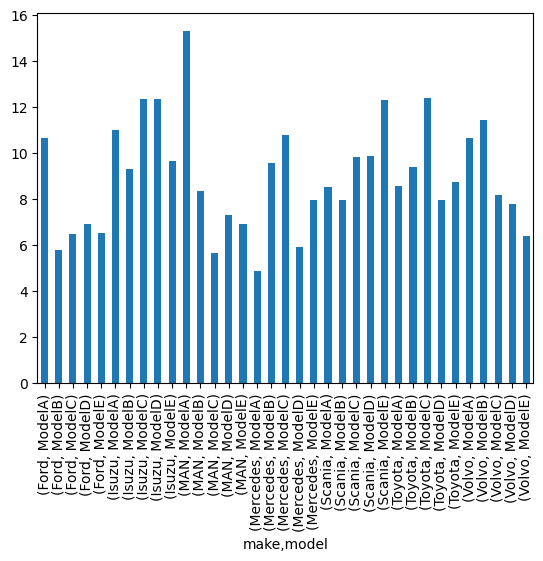

In [65]:
# o	Vehicle performance by make and model

df.groupby(['make','model'])['fuel_efficiency_km_l'].mean().plot(kind='bar')

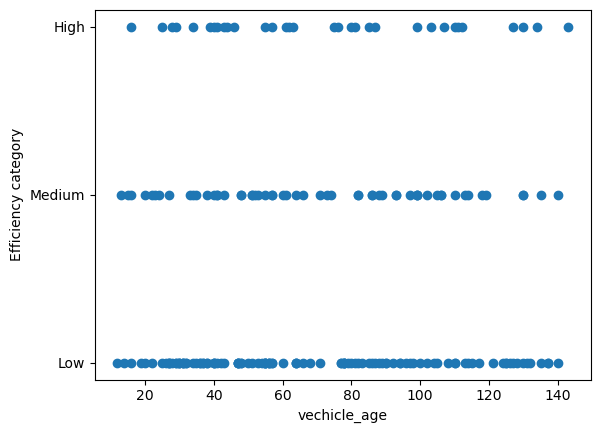

In [66]:
#o	Age vs efficiency correlation analysis
plt.scatter(df['vechicle_age'], df['Efficiency category'])
plt.xlabel("vechicle_age")
plt.ylabel('Efficiency category')
plt.show()
           

<Axes: xlabel='vehicle_type'>

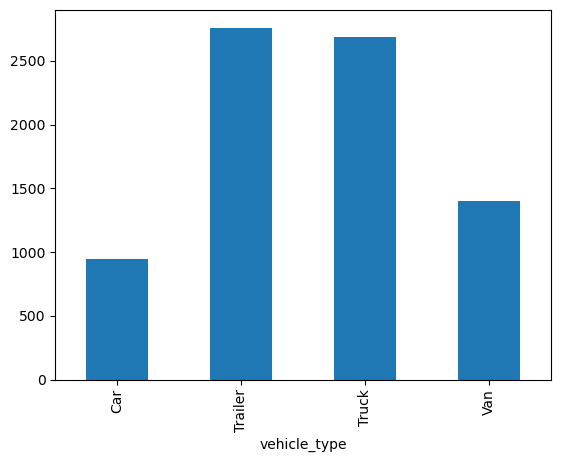

In [67]:
#o	Maintenance cost trends by vehicle type

df.groupby('vehicle_type')['annual_maintenance_cost'].mean().plot(kind='bar')


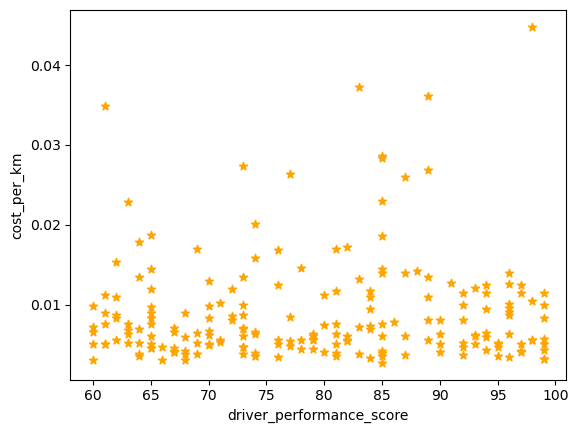

In [68]:
#o	Driver performance impact analysis
plt.scatter(df['driver_performance_score'], df['cost_per_km'],color='orange', marker='*')
plt.xlabel('driver_performance_score')
plt.ylabel('cost_per_km')
plt.show()

In [69]:
df=df.drop(df.columns[15], axis=1)

In [70]:
df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'Efficiency category'],
      dtype='object')

In [72]:
df.columns.str.replace(' ','_')

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'Efficiency_category'],
      dtype='object')

In [73]:
df.columns.str.lower()

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'efficiency category'],
      dtype='object')

In [74]:
df.columns.str.strip()

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'Efficiency category'],
      dtype='object')

In [75]:
df=df.rename(columns={"Efficiency category":"Efficiency_category"})

In [76]:
df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'Efficiency_category'],
      dtype='object')

In [77]:
df.columns.str.strip()

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'Efficiency_category'],
      dtype='object')

In [79]:
cols = df.columns
cols = cols.str.strip()
cols = cols.str.lower()
cols = cols.str.replace(' ', '_')
cols = cols.str.replace('[^0-9a-zA-Z_]', '', regex=True)
df.columns = cols

In [81]:
df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'vehicle_type', 'capacity_kg',
       'purchase_date', 'current_mileage_km', 'fuel_efficiency_km_l',
       'annual_maintenance_cost', 'driver_performance_score', 'vechicle_age',
       'cost_per_km', 'monthly_milegade', 'vechicle_age_month',
       'efficiency_category'],
      dtype='object')

In [82]:
df.to_csv("cleaned_fleet_project_datasets_fixed.csv", index= False)
"cleaned_fleet_project_datasets_fixed.csv"

'cleaned_fleet_project_datasets_fixed.csv'